# Hacker-Earth machine learning challange

## Predict the DEFCON level

Military conflict is an intense state of violence. In such situations, it is crucial for a nation to stay alert, cope with it, and mitigate its implications. A country has set up the DEFCON (Defense Readiness Condition) warning system. This alert system is used to gauge the level of alertness of the defense forces. It consists of five levels of readiness for the military forces to be prepared for the consequences of the conflict. The DEFCON system allows the nation’s forces to be a step ahead of its rivals.

You are given a synthesized data that can be used to build a model that can accurately predict the DEFCON level raised as a result of the conflict.

## Step 1: Exploratory Data Analysis

In [3]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [4]:
train_data = pd.read_csv('train.csv')

In [10]:
train_data.head()

,Allied_Nations,Diplomatic_Meetings_Set,Percent_Of_Forces_Mobilized,Hostile_Nations,Active_Threats,Inactive_Threats,Citizen_Fear_Index,Closest_Threat_Distance(km),Aircraft_Carriers_Responding,Troops_Mobilized(thousands),DEFCON_Level,ID
0,16,1,0.67,3,6.0,25.0,0.787812,324.36,1,862400.0,3,7570
1,8,1,0.11,2,38.0,48.0,0.419236,359.34,0,959200.0,4,12128
2,9,1,0.49,3,32.0,69.0,0.582232,332.84,1,836000.0,3,2181
3,7,0,0.30,2,31.0,52.0,0.589574,358.28,1,924000.0,3,5946
4,8,1,0.12,5,13.0,42.0,0.552863,364.64,0,968000.0,2,9054


In [12]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
Allied_Nations                  10000 non-null int64
Diplomatic_Meetings_Set         10000 non-null int64
Percent_Of_Forces_Mobilized     10000 non-null float64
Hostile_Nations                 10000 non-null int64
Active_Threats                  10000 non-null float64
Inactive_Threats                10000 non-null float64
Citizen_Fear_Index              10000 non-null float64
Closest_Threat_Distance(km)     10000 non-null float64
Aircraft_Carriers_Responding    10000 non-null int64
Troops_Mobilized(thousands)     10000 non-null float64
DEFCON_Level                    10000 non-null int64
ID                              10000 non-null int64
dtypes: float64(6), int64(6)
memory usage: 937.6 KB


In [15]:
train_data.columns

Index(['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)',
       'DEFCON_Level', 'ID'],
      dtype='object')

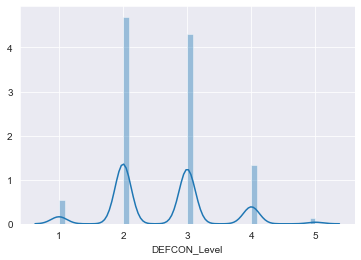

In [19]:
sns.distplot(train_data['DEFCON_Level'])

## Model Selection and Fitting

In [20]:
from sklearn.linear_model import LinearRegression

In [23]:
lm = LinearRegression()

In [31]:
x = train_data[['Allied_Nations', 'Diplomatic_Meetings_Set',
       'Percent_Of_Forces_Mobilized', 'Hostile_Nations', 'Active_Threats',
       'Inactive_Threats', 'Citizen_Fear_Index', 'Closest_Threat_Distance(km)',
       'Aircraft_Carriers_Responding', 'Troops_Mobilized(thousands)']]

y = train_data['DEFCON_Level']

In [32]:
lm.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:
# Model coefficients
cdf = pd.DataFrame(lm.coef_,x.columns,columns=['Coefficient'])
cdf

,Coefficient
Allied_Nations,0.013069
Diplomatic_Meetings_Set,-0.224216
Percent_Of_Forces_Mobilized,0.159055
Hostile_Nations,-0.005387
Active_Threats,0.005578
Inactive_Threats,-0.002547
Citizen_Fear_Index,-0.281887
Closest_Threat_Distance(km),-0.002577
Aircraft_Carriers_Responding,0.190500
Troops_Mobilized(thousands),0.000003
